<a href="https://colab.research.google.com/github/Sameenzehra/CNN-models/blob/main/cifar10_model_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# creating model with CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.datasets import cifar10


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models

In [32]:
(x_train, y_train),(x_test,y_test)= tf.keras.datasets.cifar10.load_data()

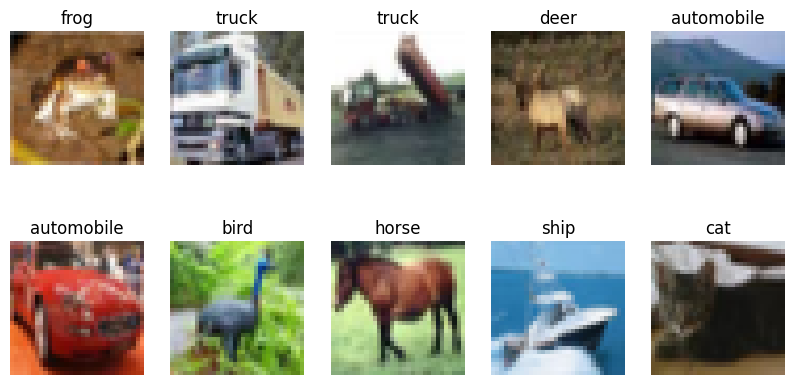

In [33]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# create figure to show images
fig, axes = plt.subplots(2, 5, figsize=(10,5))

# loop through the data
for i, ax in enumerate(axes.flat):

    # select the image and label
    image , label = x_train[i], y_train[i]


    # show image within the figure
    ax.imshow(image)
    # set the title of the image
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')



# Show the figure with the images
plt.show()

# Close the figure
plt.close()


In [34]:
# Normalize the pixels of the image
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0

In [35]:
print("x_ train shape",  x_train.shape)
print("y_train's shape", y_train.shape)
print("x_test's shape",  x_test.shape)
print("y_test's shape is" ,y_test.shape)


x_ train shape (50000, 32, 32, 3)
y_train's shape (50000, 1)
x_test's shape (10000, 32, 32, 3)
y_test's shape is (10000, 1)


In [36]:
# convert the target variable into categories/one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [37]:
print("y_train's shape", y_train.shape)
print("y_test's shape", y_test.shape)

y_train's shape (50000, 10)
y_test's shape (10000, 10)


In [38]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [82]:
from tensorflow.keras.layers import Dropout
# define CNN model
model = Sequential()
# conv layer with 32 filters/kernel size 3*3 input shape (32*32*3)
# input size = 32*32*3 kernel_size = 3*3 num of kernel =32 output_size = 30*30*32
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
# max pooling layer with size 2*2
# output size = 15*15*32
model.add(MaxPooling2D((2,2)))
layers.Dropout(0.25)
# conv layer with 64 filters kernel size = 3*3 number of kernel=64 output=13*13*64
# input size = 15*15*32, kernel_size = 3*3,
model.add(Conv2D(64, (3,3), activation='relu'))
# input size = 2*2
model.add(MaxPooling2D((2,2)))
layers.Dropout(0.25)
# conv layer with 64 filters and kernel size 3*3
# input = 6*6*64  kernel_size =3*3 num of kernel 64 output = 4*4*64
model.add(Conv2D(64, (3,3), activation='relu'))
# flatten layer convert the matrics into single vector
model.add(Flatten())
# Dense layer with 64 units
# input size 1024 output 64
model.add(Dense(64, activation='relu'))
# dropout feature is used to avoid overfitting n generalize the model
model.add(Dropout(0.5))
# output classification layer, 10 is number of classes
model.add(Dense(10, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [84]:

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [85]:
history = model.fit(x_train, y_train, batch_size=32, epochs=25,validation_split= 0.2, validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 10s 5ms/step - loss: 1.6928 - accuracy: 0.3774 - val_loss: 1.2947 - val_accuracy: 0.5392
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3409 - accuracy: 0.5235 - val_loss: 1.2033 - val_accuracy: 0.5577
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2042 - accuracy: 0.5744 - val_loss: 1.0613 - val_accuracy: 0.6247
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1028 - accuracy: 0.6154 - val_loss: 1.0668 - val_accuracy: 0.6317
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0302 - accuracy: 0.6396 - val_loss: 0.9566 - val_accuracy: 0.6632
Epoch 6/25
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9771 - accuracy: 0.6603 - val_loss: 0.9054 - val_accuracy: 0.6812
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9294 - accuracy: 0.6769 - val_loss: 0.9098 - val_accuracy

In [86]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.9443 - accuracy: 0.7247
Test loss: 0.9443
Test accuracy: 0.7247


* used RMSprop optimizer that diverge the model
*  decreases learning rate for Adam(0.001 to 0.0001)
*  increased epoches from 10, 15,20 ,25 but each time loss increased
*  val_accuracy = 74.48 increased when lr=0.0001 epochs =25 but loss was 1.4758
* too much fluctuation in val_accuracy =72.9 to 71.97 when increased batch_size
  =45 and loss reached to 2.0181
* with SGD loss is 2.3306 and accuracy = 72.99 batch size=45 epochs = 25 lr=0.0001

* optimzer = Ada(lr=0.001), batch_size = 32, epochs=25, acc=72.47 , loss = 0.9443


Text(0.5, 1.0, 'Training and validation loss')

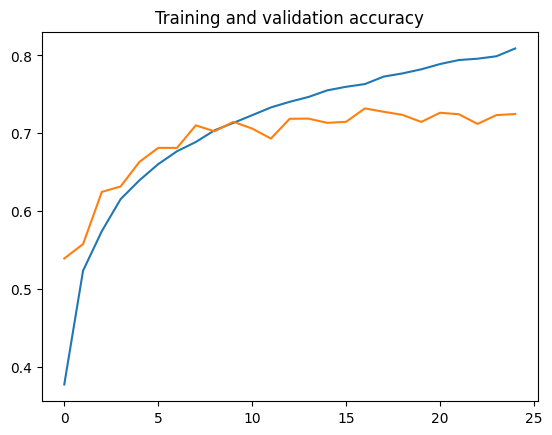

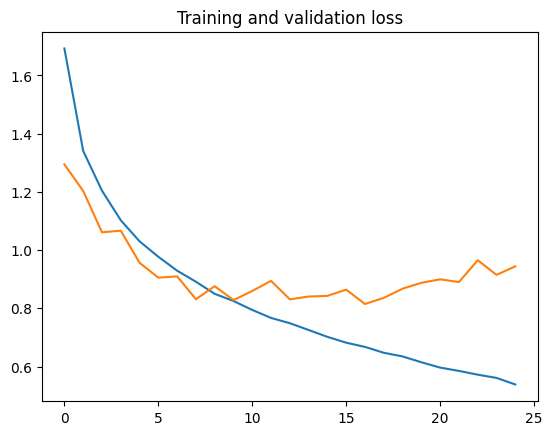

In [89]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [90]:
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


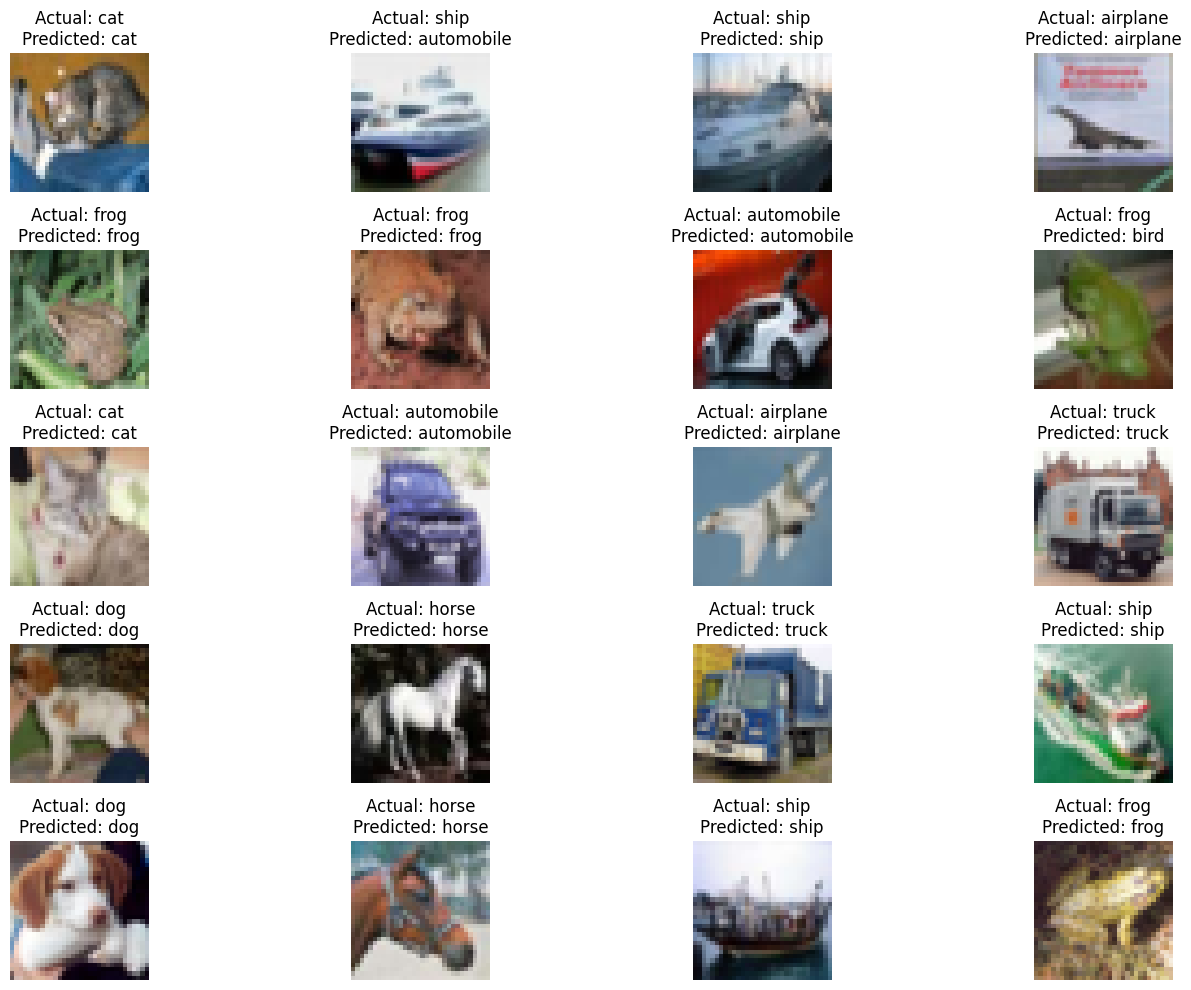

In [91]:
num_of_images_to_display = 20
num_columns = 4
num_rows = (num_of_images_to_display +  num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    if i < num_of_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

# **summary**

A test loss of 0.94.4 indicates that the model's predictions have an average error, as measured by the categorical cross-entropy loss function.With a test accuracy of 72.47%, the model correctly classifies approximately 72.48% of the test samples. While not perfect, this performance might be considered reasonably good depending on the complexity of the problem and the acceptable accuracy for the application.